<a href="https://colab.research.google.com/github/AlexTeboul/msds/blob/main/csc528-computer-vision/Generating_Fake_Faces_Exploring_StyleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating Fake Faces - Exploring StyleGAN2
**Alex Teboul**

**Reference Research:**
 

1.   Karras, T., Laine, S., Aittala, M., Hellsten, J., Lehtinen, J., & Aila, T.(2019). Analyzing and improving the image quality of stylegan. arXiv preprint arXiv:1912.04958.
 * https://arxiv.org/pdf/1912.04958.pdf ← StyleGAN2
2.   Karras, T., Laine, S., & Aila, T. (2019). A style-based generator architecture for generative adversarial networks. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 4401-4410).
 * https://arxiv.org/pdf/1812.04948.pdf ← StyleGAN
3.   Shen, Y., Gu, J., Tang, X., & Zhou, B. (2019). Interpreting the latent space of gans for semantic face editing. arXiv preprint arXiv:1907.10786.
 * https://arxiv.org/pdf/1907.10786.pdf ← InterFaceGAN










# 1. Connect your Google Drive & Use TensorFlow 1.x

In [ ]:
#Some Imports for the notebook:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#First, make sure the runtime type is set to GPU. You need a GPU to use StyleGAN2
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Run this for Google CoLab (use TensorFlow 1.x)
%tensorflow_version 1.x

TensorFlow 1.x selected.


## 2. Clone StyleGAN2 from Github

In [ ]:
#Clone the github for NVIDIA StyleGAN2
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 93, done.
remote: Total 93 (delta 0), reused 0 (delta 0), pack-reused 93
Unpacking objects: 100% (93/93), done.


In [ ]:
#This command lists the what is in the stylegan2 directory now.
!ls /content/stylegan2/

dataset_tool.py  LICENSE.txt		 README.md	   run_training.py
dnnlib		 metrics		 run_generator.py  test_nvcc.cu
Dockerfile	 pretrained_networks.py  run_metrics.py    training
docs		 projector.py		 run_projector.py


3. Generate faces directly from the command line (proof-of-concept)

In [ ]:
#This will generate as many images as you have seeds. So for example 2000-2099 gives you 100 images. These seeds go to a random number generator.
#The faces generated here via a 512 number vector, called the latent vector. 
#Changing the 512 number vector allows you to transform the image itself.
#These images end up in /content/results/00000-generate-images

!python /content/stylegan2/run_generator.py generate-images \
    --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
  --seeds=2000-2099 --truncation-psi=0.5

Local submit - run_dir: results/00003-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating image for seed 2000 (0/100) ...
Generating image for seed 2001 (1/100) ...
Generating image for seed 2002 (2/100) ...
Generating image for seed 2003 (3/100) ...
Generating image for seed 2004 (4/100) ...
Generating image for seed 2005 (5/100) ...
Generating image for seed 2006 (6/100) ...
Generating image for seed 2007 (7/100) ...
Generating image for seed 2008 (8/100) ...
Generating image for seed 2009 (9/100) ...
Generating image for seed 2010 (10/100) ...
Generating image for seed 2011 (11/100) ...
Generating image for seed 2012 (12/100) ...
Generating image for seed 2013 (13/100) ...
Generating image for seed 2014 (14/100) .

In [ ]:
#Show the directory where the new images are.
!ls /content/results/00000-generate-images

_finished.txt  seed6600.png  seed6603.png  seed6606.png  seed6609.png
log.txt        seed6601.png  seed6604.png  seed6607.png  submit_config.pkl
run.txt        seed6602.png  seed6605.png  seed6608.png  submit_config.txt


In [ ]:
#Save these to a set place in gdrive
#cp just copies the content. So all the images and other stuff in that directory is now in my google drive. Don't mind the \'s, they just escape the spaces in my directory names.
!cp /content/results/00003-generate-images/* /content/gdrive/My\ Drive/CSC\ 528\ -\ Computer\ Vision/data/sample_styleGAN2_50

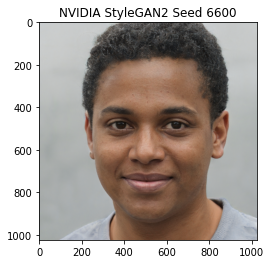

In [ ]:
#Display the first image of the set you generated
#/content/gdrive/My Drive/CSC 528 - Computer Vision/data/sample_stylegan2/seed6600.png
#You'll need to change the directory info in imread to match your own google drive or local directory if you're going the jupyter notebook route
rgb_img = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/CSC 528 - Computer Vision/data/sample_stylegan2/seed6600.png"),cv2.COLOR_BGR2RGB)
plt.title("NVIDIA StyleGAN2 Seed 6600")
plt.imshow(rgb_img)

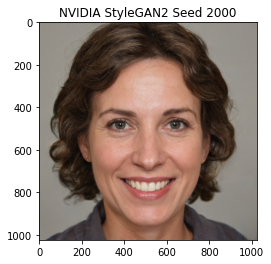

In [ ]:
#Display the first image (of the set of 50 for seeds 2000-2049):
#Just another example here of showing an image
#/content/gdrive/My Drive/CSC 528 - Computer Vision/data/sample_styleGAN2_50/seed2000.png
rgb_img = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/CSC 528 - Computer Vision/data/sample_styleGAN2_50/seed2000.png"),cv2.COLOR_BGR2RGB)
plt.title("NVIDIA StyleGAN2 Seed 2000")
plt.imshow(rgb_img)

In [ ]:
#Grids example from the paper
!python /content/stylegan2/run_generator.py style-mixing-example \
    --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
  --row-seeds=85,100,75,458,1500 --col-seeds=55,821,1789,293 --truncation-psi=1.0

Local submit - run_dir: results/00001-style-mixing-example
dnnlib: Running run_generator.style_mixing_example() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating W vectors...
Generating images...
Generating style-mixed images...
Saving images...
Saving image grid...
dnnlib: Finished run_generator.style_mixing_example() in 1m 01s.


In [ ]:
#Show the directory where the new images are.
!ls /content/results/00000-style-mixing-example

1500-1500.png  2000-2000.png  458-458.png    6600-6600.png  821-821.png
1500-1789.png  2000-293.png   458-55.png     6600-821.png   _finished.txt
1500-293.png   2000-55.png    458-821.png    75-1789.png    grid.png
1500-55.png    2000-821.png   55-55.png      75-293.png     log.txt
1500-821.png   293-293.png    6600-1789.png  75-55.png	    run.txt
1789-1789.png  458-1789.png   6600-293.png   75-75.png	    submit_config.pkl
2000-1789.png  458-293.png    6600-55.png    75-821.png     submit_config.txt


In [ ]:
#Save these to a set place in gdrive
#cp just copies the content. So all the images and other stuff in that directory is now in my google drive. Don't mind the \'s, they just escape the spaces in my directory names.
!cp /content/results/00000-style-mixing-example/* /content/gdrive/My\ Drive/CSC\ 528\ -\ Computer\ Vision/data/style_mixing_example

## Part 2: Face Editing - Try on your own or follow an Arxiv insights tutorial in the reference notebooks below

In [ ]:
#Get pre-trained InterFaceGAN
!git clone https://github.com/tr1pzz/InterFaceGAN.git

Cloning into 'InterFaceGAN'...
remote: Enumerating objects: 127, done.
remote: Total 127 (delta 0), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (127/127), 2.06 MiB | 1.68 MiB/s, done.
Resolving deltas: 100% (14/14), done.


**Reference Notebooks:**

1.   [Arxiv Insights StyleGAN Tutorial](https://colab.research.google.com/drive/1jrSki9OXahtnS2Okcf7_ubvLkPnboJey)
2.   [Arxiv Insights InterFaceGAN](https://colab.research.google.com/drive/1mH70YxGNlnEaSOn0J8Lsgkl-QOvsIb3M)
4.   [Jeff Heaton StyleGAN Examples](https://colab.research.google.com/github/jeffheaton/present/blob/master/youtube/gan_explore.ipynb#scrollTo=4-J1eTJwRlY8)
5.   [Jeff Heaton StyleGAN2 Tutorial](https://colab.research.google.com/github/jeffheaton/present/blob/master/youtube/video/gan2video.ipynb)
6.   [Jeff Heaton GAN basics examples](https://colab.research.google.com/github/jeffheaton/present/blob/master/youtube/style_gan.ipynb)
7.   [Arxiv Insights StyleGAN Explanation](https://www.youtube.com/watch?v=dCKbRCUyop8)
